<a href="https://colab.research.google.com/github/Nargis45/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Retail Customer Segmentation**

## **Problem Statement**
**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **Data Description**

## **Attribute Information:**
**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
 
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
#Load the dataset
# Read The Datset "Online Retail"
df=pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation/Online Retail.xlsx')

In [265]:
#head() helps to read top 5 record of dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# **Data Wrangling**

In [266]:
#shape of dataset
df.shape

(541909, 8)

* **Shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns.**

In [267]:
#checking datatype and null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [268]:
#statistical representation of dataset
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [269]:
#counting the null values in each column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

* **null values are present in CustomerID and Description column only**

In [270]:
# Missing Values percentage contribution in Dataframe
df_null = round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)
df_null

CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

* **In CustomerID ~24% of data is null.**

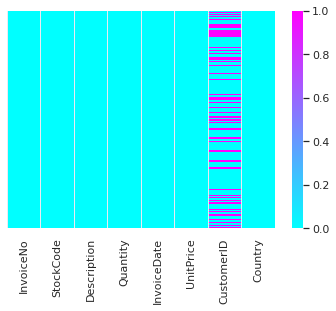

In [271]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), yticklabels=False, annot=False, cmap='cool')

* **There is some null value present in our dataset like in CustomerID and Description**

In [272]:
#dropping all the rows with null values
df.dropna(inplace=True)

* **CustomerID is our identification feature so if its missing means other wont help us in analysis**

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [274]:
df.shape

(406829, 8)

* **After removeing null value in our dataset .it reduces to (406829, 8)**

In [275]:
df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

* **min value of Quantity column is negative.**
* **UnitPrice has 0 as min value**

In [276]:
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [277]:
#changing the datatype of InvoiceNo to string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [278]:
#InvoiceNo starts with C means it's a cancellation. We need to drop these entries.
df=df[~df['InvoiceNo'].str.contains('C')]

* **we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation**

In [279]:
df.shape

(397924, 8)

In [280]:
df.describe()

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [281]:
#Checking how many values are present for unitprice==0
len(df[df['UnitPrice']==0])

40

* **40 values are present so will drop these values**

In [282]:
# taking unitprice values greater than 0.
df=df[df['UnitPrice']>0]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [283]:
df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [284]:
df.shape

(397884, 8)

# **Exploratory data analysis**

In [285]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1723
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1396

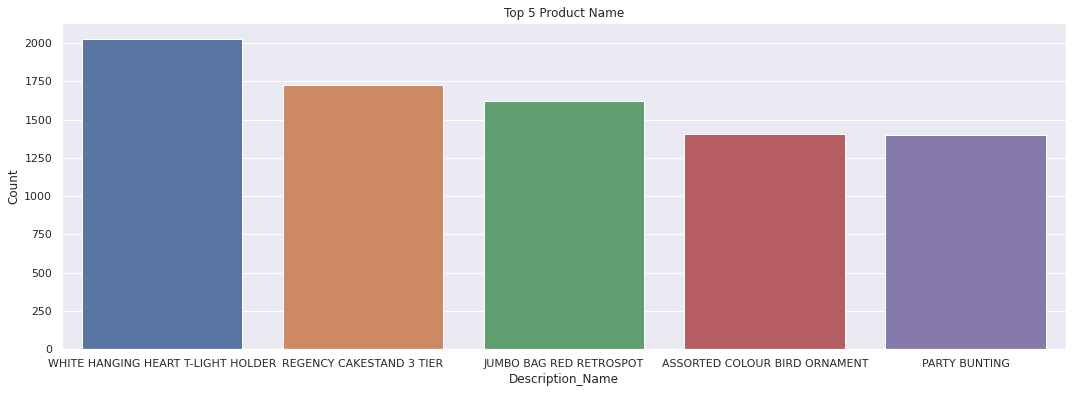

In [286]:
plt.figure(figsize=(18,6))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

**Top product based on maximum selling are :**

      1.WHITE HANGING HEART T-LIGHT HOLDER,

      2.REGENCY CAKESTAND 3 TIER

      3.JUMBO BAG RED RETROSPOT

      4.PARTY BUNTING

      5.LUNCH BAG RED RETROSPOT

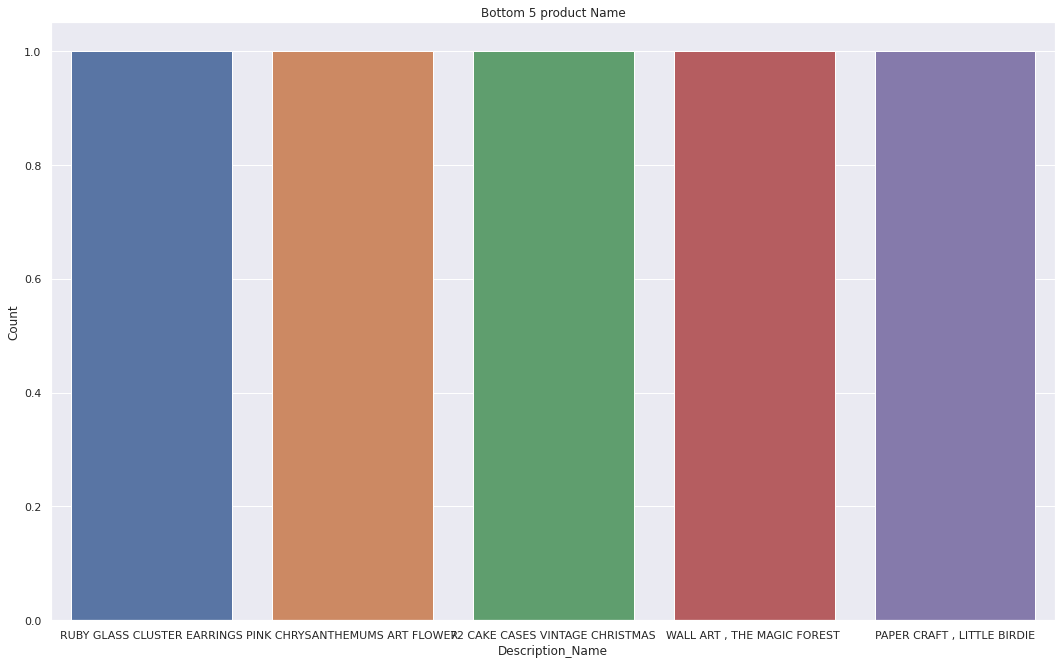

In [287]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom 5 Product based on the selling are:**

    1.LIGHT DECORATION BATTERY OPERATED	
    2.Water damaged	
    3.throw away	
    4.re dotcom quick fix.	
    5.BIRTHDAY BANNER TAPE

In [288]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

StockCode_Name  Count
0         85123A   2035
1          22423   1723
2         85099B   1618
3          84879   1408
4          47566   1396

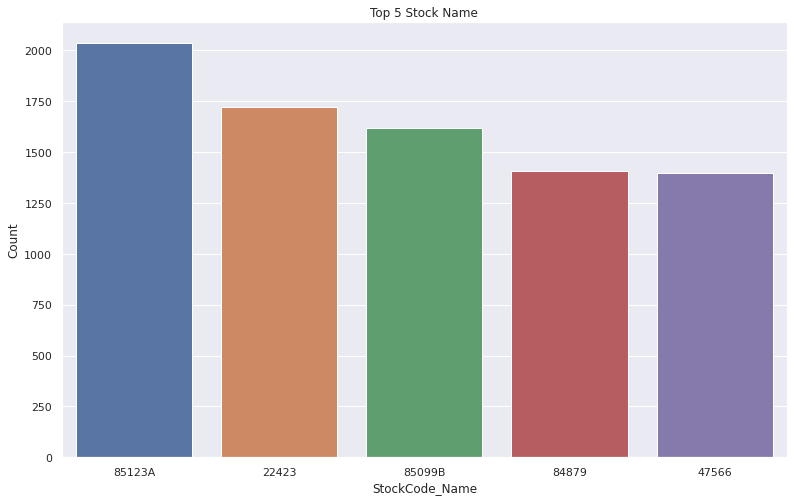

In [289]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

**Top 5 Stock name based on selling are :**

    1.85123A
    2.22423
    3.85099B	
    4.47566
    5.20725

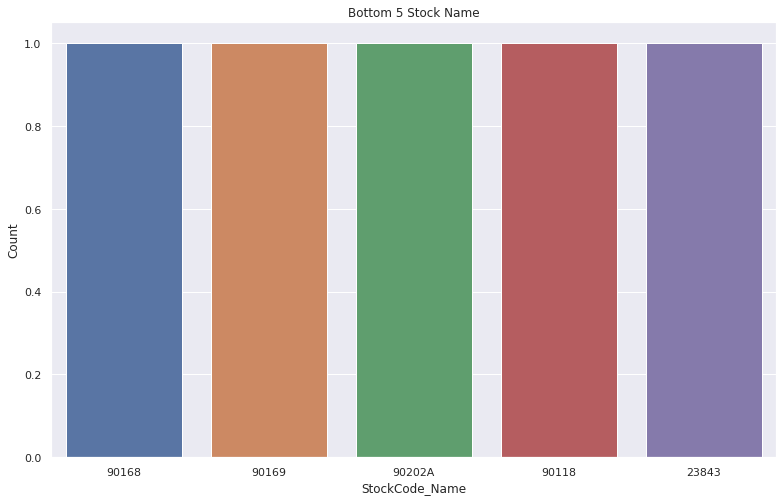

In [290]:
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [291]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

Country_Name   Count
0  United Kingdom  354321
1         Germany    9040
2          France    8341
3            EIRE    7236
4           Spain    2484

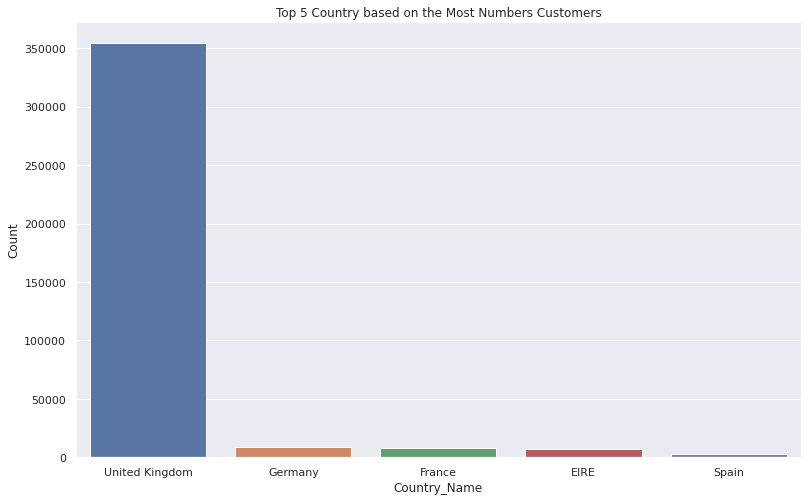

In [292]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

* **From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

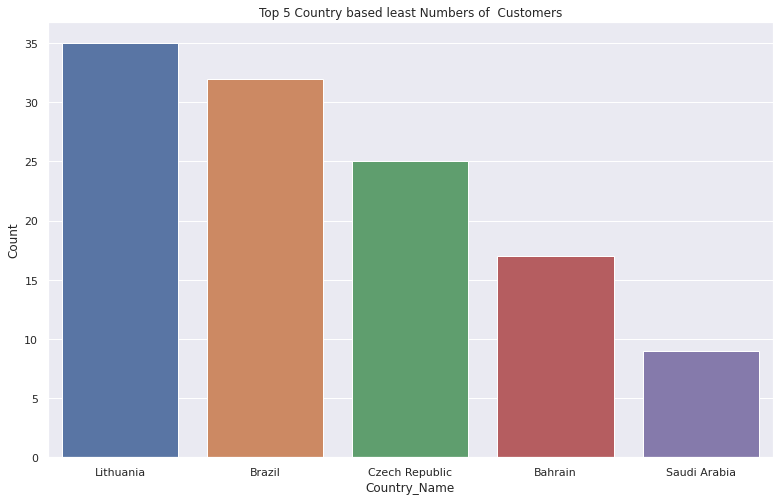

In [293]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

* **From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia**

In [294]:
df[df['Country']=='Saudi Arabia']

InvoiceNo StockCode                        Description  Quantity  \
100810    544838     22915      ASSORTED BOTTLE TOP  MAGNETS         12   
100811    544838     22363               GLASS JAR MARMALADE          6   
100812    544838     22362       GLASS JAR PEACOCK BATH SALTS         6   
100813    544838     22361  GLASS JAR DAISY FRESH COTTON WOOL         6   
100814    544838     22553             PLASTERS IN TIN SKULLS        12   
100815    544838     22555          PLASTERS IN TIN STRONGMAN        12   
100816    544838     22556     PLASTERS IN TIN CIRCUS PARADE         12   
100817    544838     20781           GOLD EAR MUFF HEADPHONES         2   
100818    544838     22969       HOMEMADE JAM SCENTED CANDLES        12   

               InvoiceDate  UnitPrice  CustomerID       Country  
100810 2011-02-24 10:34:00       0.42     12565.0  Saudi Arabia  
100811 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100812 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100813 2011-02-24 10:34:00       2.95     12565.0  Saudi Arabia  
100814 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100815 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100816 2011-02-24 10:34:00       1.65     12565.0  Saudi Arabia  
100817 2011-02-24 10:34:00       5.49     12565.0  Saudi Arabia  
100818 2011-02-24 10:34:00       1.45     12565.0  Saudi Arabia

**1. Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.here, mean>median>mode**

**2. Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.here, mean<median<mode**

**3. For symmetric graph mean=median=mode**

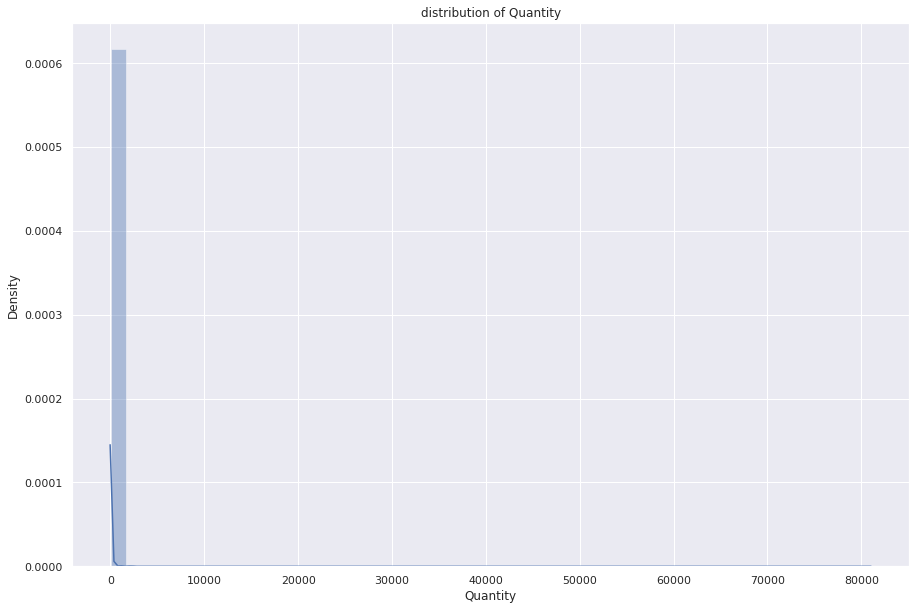

In [295]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

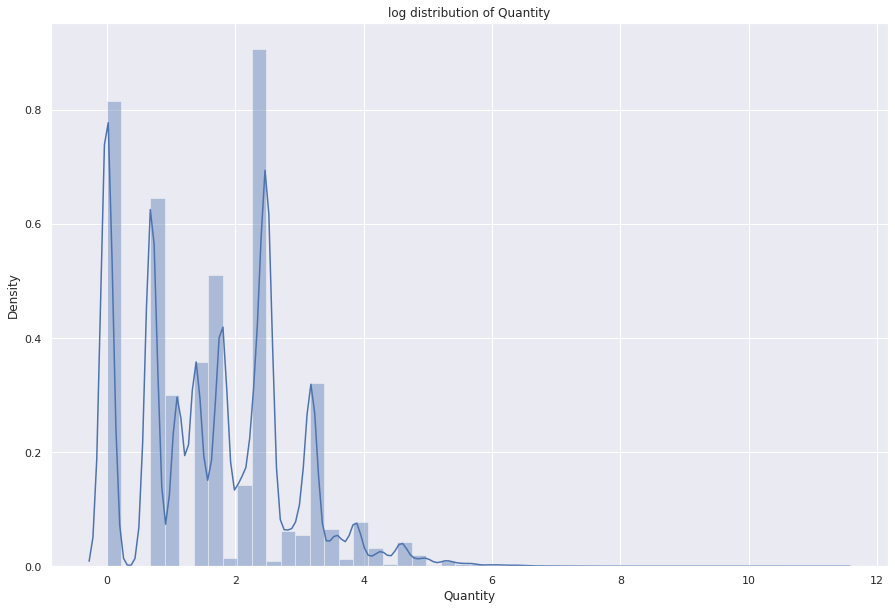

In [296]:
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [297]:
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

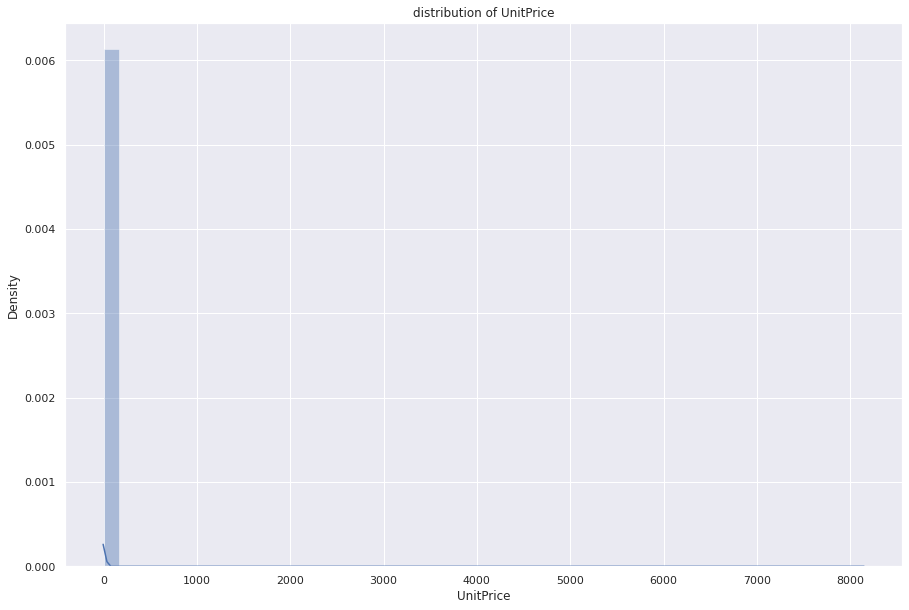

In [298]:
plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [299]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

# **Feature engineering**

In [300]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

* **Convert InvoiceDate columns into date time format**

In [301]:
df['Day']=df['InvoiceDate'].dt.day_name()

* **Create a new features Day from Invoicedate**

In [302]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [303]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  
0         12        1     8      26  
1         12        1     8      26  
2         12        1     8      26  
3         12        1     8      26  
4         12        1     8      26

* **Create some new features from Invoicedate like hours,year,month_num,day_num**

In [304]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

* **Create a new features TotalAmount from product of Quantity and Unitprice**

In [305]:
#adding a new column Month
df['Month']=df['InvoiceDate'].dt.month_name()

In [306]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month  
0         12        1     8      26        15.30  December  
1         12        1     8      26        20.34  December  
2         12        1     8      26        22.00  December  
3         12        1     8      26        20.34  December  
4         12        1     8      26        20.34  December

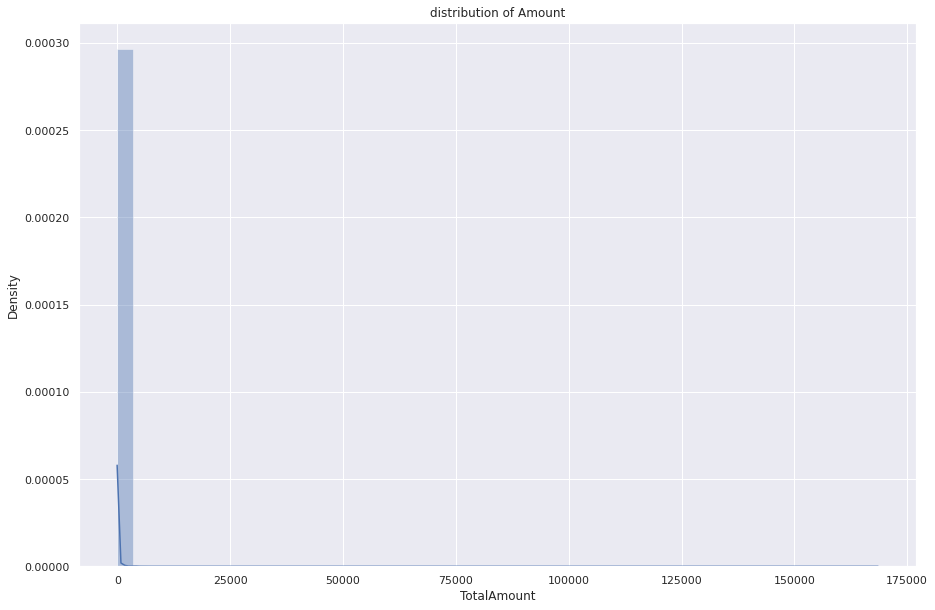

In [307]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [308]:
df['TotalAmount'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

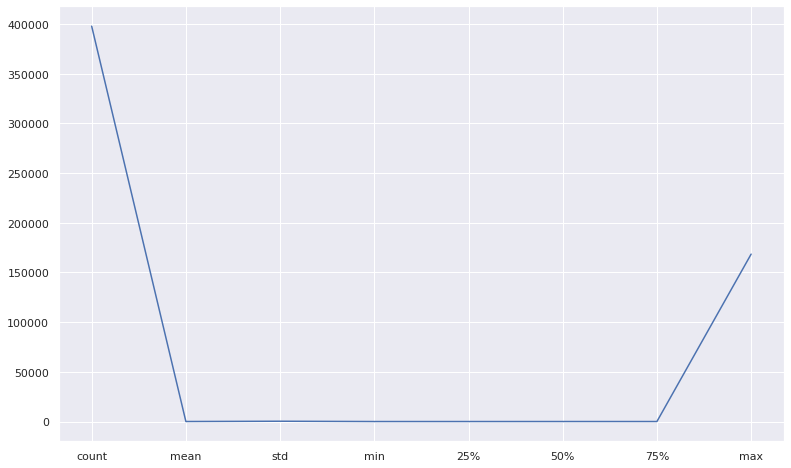

In [309]:
plt.figure(figsize=(13,8))
df['TotalAmount'].describe().plot()

In [310]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  80035
1  Wednesday  68885
2    Tuesday  66473
3     Monday  64893
4     Sunday  62773
5     Friday  54825

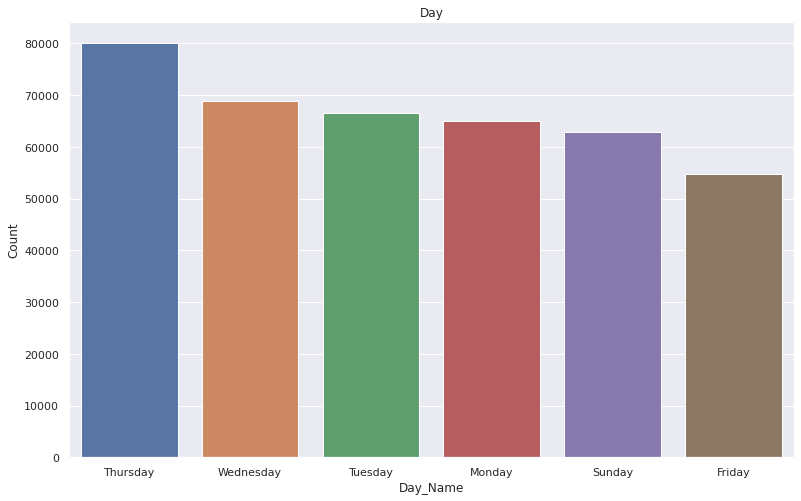

In [311]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

* **Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [312]:
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0    November  64531
1     October  49554
2    December  43461
3   September  40028
4         May  28320
5        June  27185
6       March  27175
7      August  27007
8        July  26825
9       April  22642
10    January  21229
11   February  19927

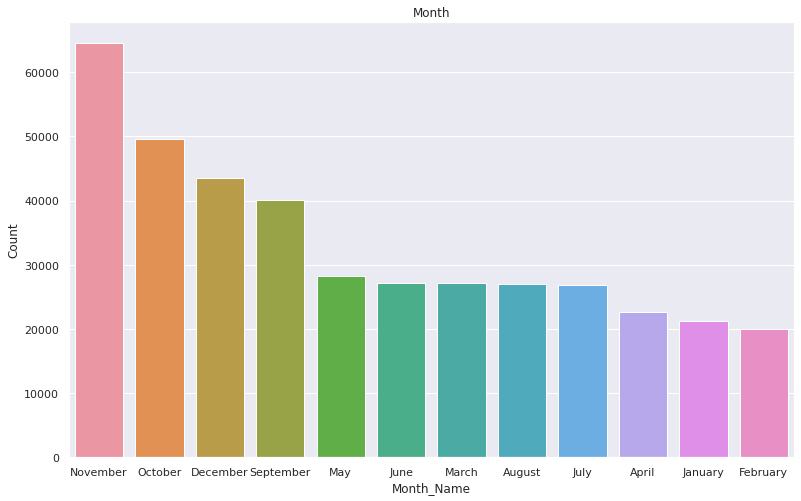

In [313]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

* **most numbers of customers have purches the gifts in the month of November ,October and December September**
* **less numbers of customers have purches the gifts in the month of April ,january and February**

In [314]:
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  72065
1          13  64026
2          14  54118
3          11  49084
4          15  45369
5          10  37997
6          16  24089
7           9  21944
8          17  13071
9           8   8690
10         19   3321
11         18   2928
12         20    802
13          7    379
14          6      1

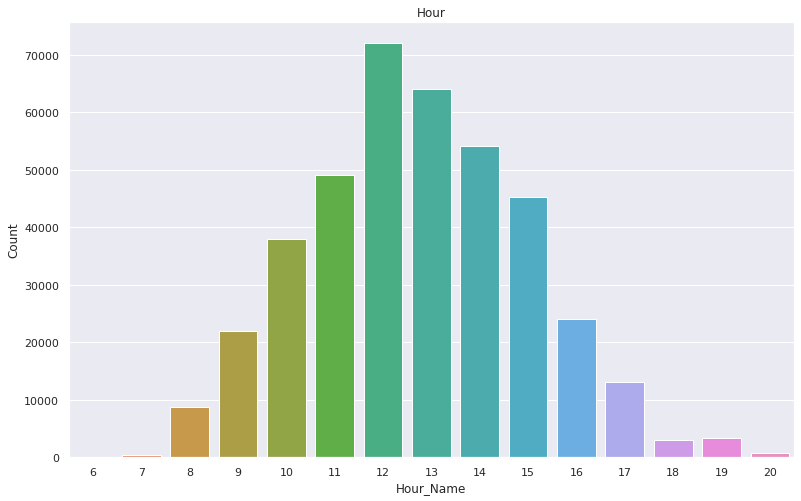

In [315]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)


* **From this graph we can see that in Afternoon Time most of the customers have purches the item.**

In [316]:
def time_type(time):
  '''This function will help to identify morning, afternoon and evening according to the time'''
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [317]:
df['Time_type']=df['hour'].apply(time_type)

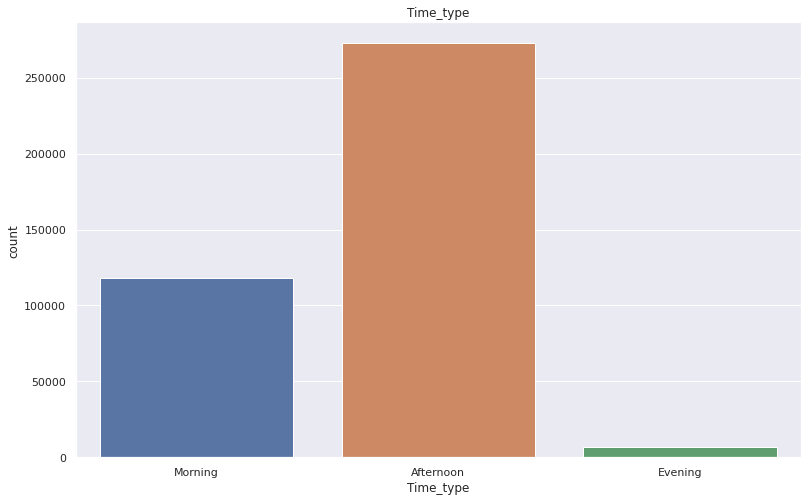

In [318]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

* **Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

In [319]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country        Day  year  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday  2010   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday  2010   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday  2010   
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  Wednesday  2010   
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  Wednesday  2010   
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  Wednesday  2010   
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  Wednesday  2010   
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom  Wednesday  2010   

   month_num  day_num  hour  minute  TotalAmount     Month Time_type  
0         12        1     8      26        15.30  December   Morning  
1         12        1     8      26        20.34  December   Morning  
2         12        1     8      26        22.00  December   Morning  
3         12        1     8      26        20.34  December   Morning  
4         12        1     8      26        20.34  December   Morning  
5         12        1     8      26        15.30  December   Morning  
6         12        1     8      26        25.50  December   Morning  
7         12        1     8      28        11.10  December   Morning  
8         12        1     8      28        11.10  December   Morning  
9         12        1     8      34        54.08  December   Morning

In [320]:
#top 10 customers
customers=df['CustomerID'].value_counts().reset_index().head(10)
customers.rename(columns={'index': 'CustomerID','CustomerID':'count'}, inplace=True)

customers

CustomerID  count
0     17841.0   7847
1     14911.0   5675
2     14096.0   5111
3     12748.0   4595
4     14606.0   2700
5     15311.0   2379
6     14646.0   2076
7     13089.0   1818
8     13263.0   1677
9     14298.0   1637

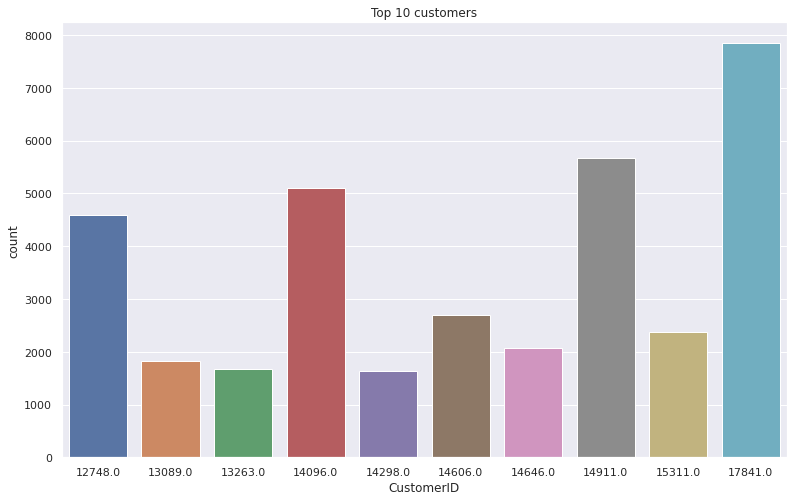

In [321]:
plt.figure(figsize=(13,8))
plt.title('Top 10 customers')
sns.barplot(x='CustomerID',y='count',data=customers)


* **customer id 17841 has purchased maximumn number of products.**

#**Model Building**
## **Using RFM model (Recency, Frequency,Monetary value)**

### **Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:**
* **Recency:** How recently did a customer made a purchase?
* **Frequency:** How often a customer makes a purchase? 
* **Monetary Value:** How much money a customer spends on a purchase?

### **Performing RFM Segmentation and RFM Analysis, Step by Step**

* **The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.**
* **The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.**

### **Calculating RFM scores**

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [322]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total amount for each customer
import datetime as dt
 
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)
 
#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})
 
#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
 
#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)
 
rfm_df.reset_index().head()


CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [323]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

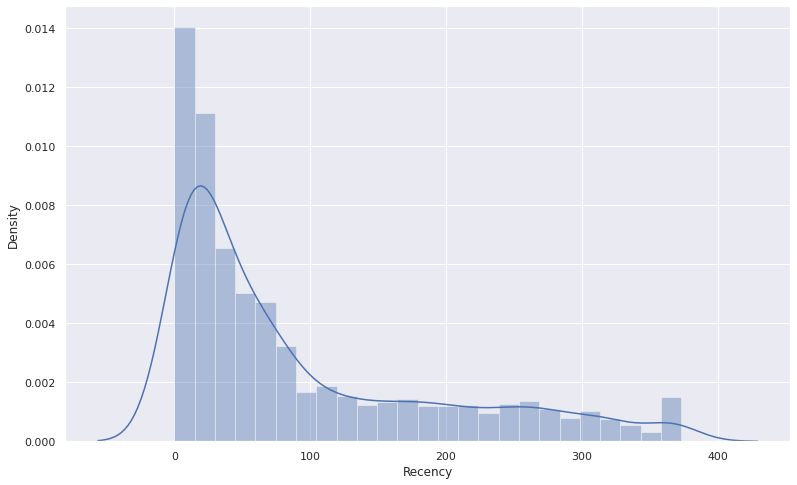

In [324]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [325]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

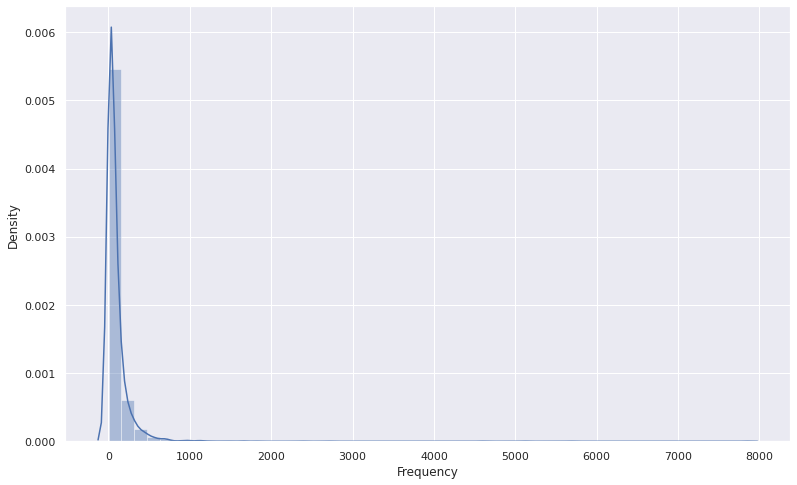

In [326]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [327]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

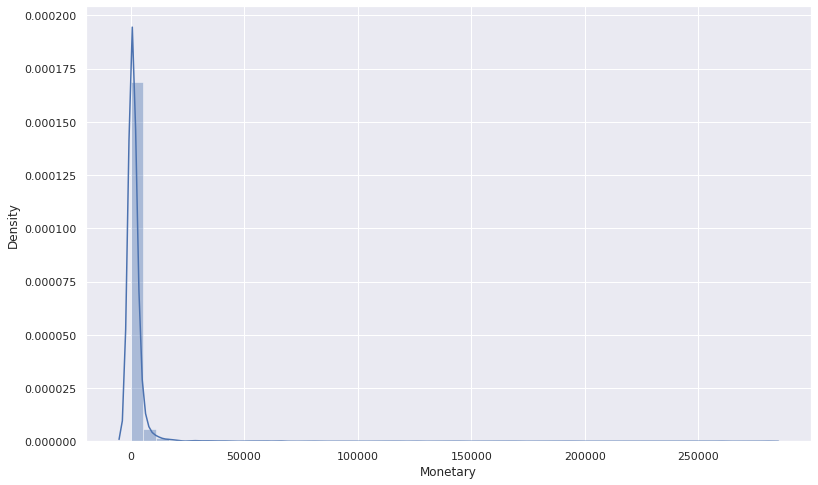

In [328]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

# **Split into four segments using quantiles**

In [329]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [330]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [331]:
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
#higher value of frequency and monetary lead to a good consumer.  
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [332]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [333]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]
 
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

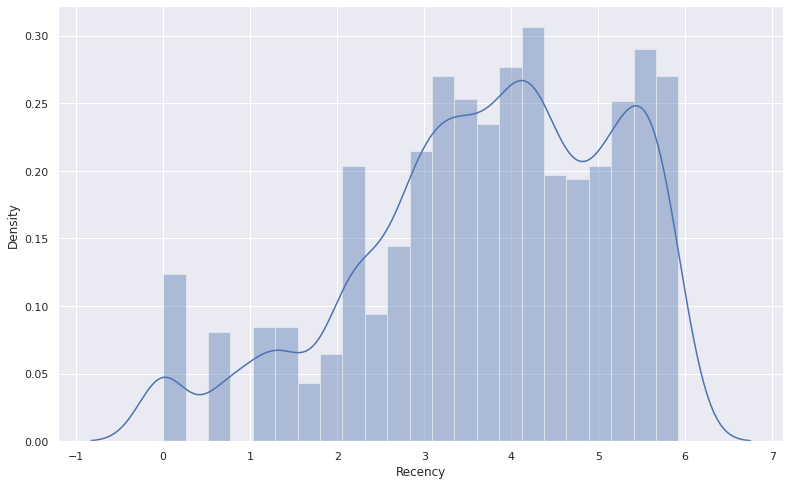

In [334]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

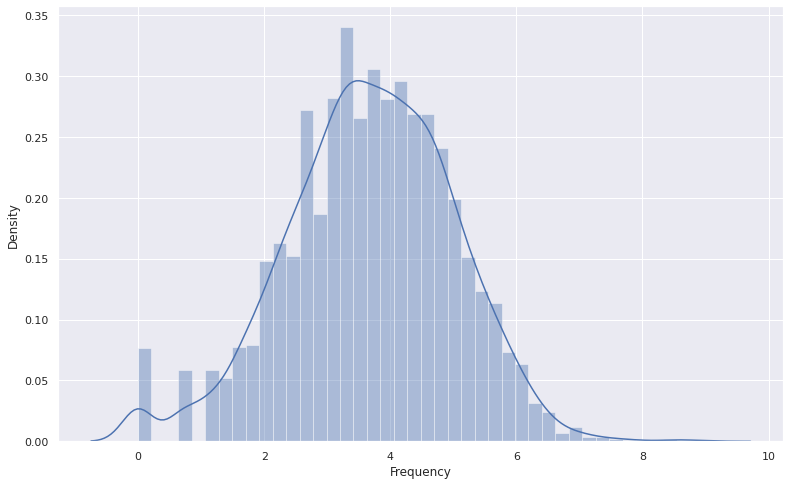

In [335]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

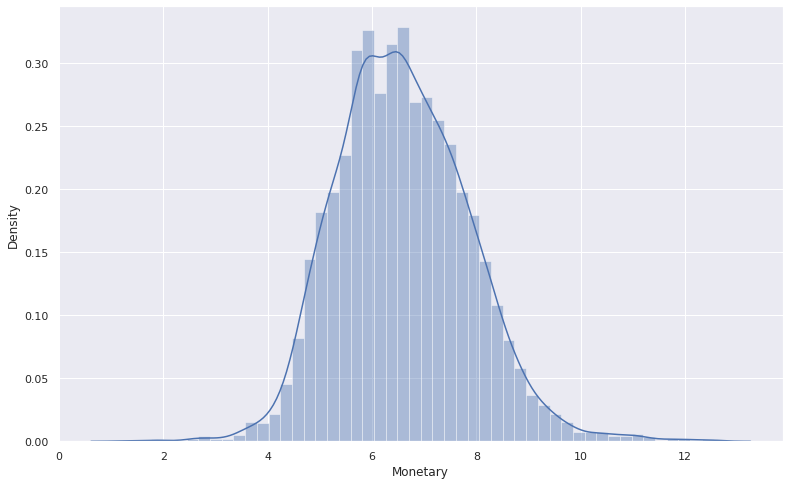

In [336]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [337]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [338]:
rfm_df.head()

Recency  Frequency  Monetary  R  F  M  Recency_log  Frequency_log  \
CustomerID                                                                      
12346.0         325          1  77183.60  4  4  1     5.783825       0.000000   
12347.0           2        182   4310.00  1  1  1     0.693147       5.204007   
12348.0          75         31   1797.24  3  3  1     4.317488       3.433987   
12349.0          18         73   1757.55  2  2  1     2.890372       4.290459   
12350.0         310         17    334.40  4  4  3     5.736572       2.833213   

            Monetary_log  
CustomerID                
12346.0        11.253942  
12347.0         8.368693  
12348.0         7.494007  
12349.0         7.471676  
12350.0         5.812338

# **K-Means Clustering**
## **Applying Silhouette Score Method on Recency and Monetary**

In [339]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
 
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.421461308316105
For n_clusters = 3, silhouette score is 0.34340822529173637
For n_clusters = 4, silhouette score is 0.3647366268074061
For n_clusters = 5, silhouette score is 0.3416600736084352
For n_clusters = 6, silhouette score is 0.3440907858179177
For n_clusters = 7, silhouette score is 0.3417162492663601
For n_clusters = 8, silhouette score is 0.33919189957122786
For n_clusters = 9, silhouette score is 0.3451636029657886
For n_clusters = 10, silhouette score is 0.3482674516090988
For n_clusters = 11, silhouette score is 0.33767213408609487
For n_clusters = 12, silhouette score is 0.34341557697650166
For n_clusters = 13, silhouette score is 0.33966486629494785
For n_clusters = 14, silhouette score is 0.33685401513401736
For n_clusters = 15, silhouette score is 0.3406851849156282


# **Calculation of Silhouette score**
**Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:**

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

**The Silhouette Coefficient for a sample is: s=(b-a)/max(a,b)**

## **Applying Elbow Method on Recency and Monetary**

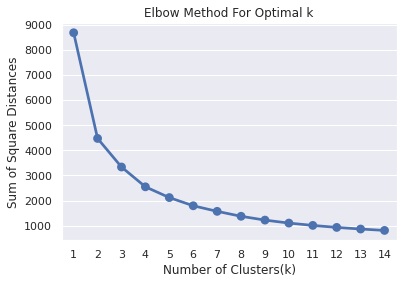

In [340]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
 
from sklearn.cluster import KMeans
 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

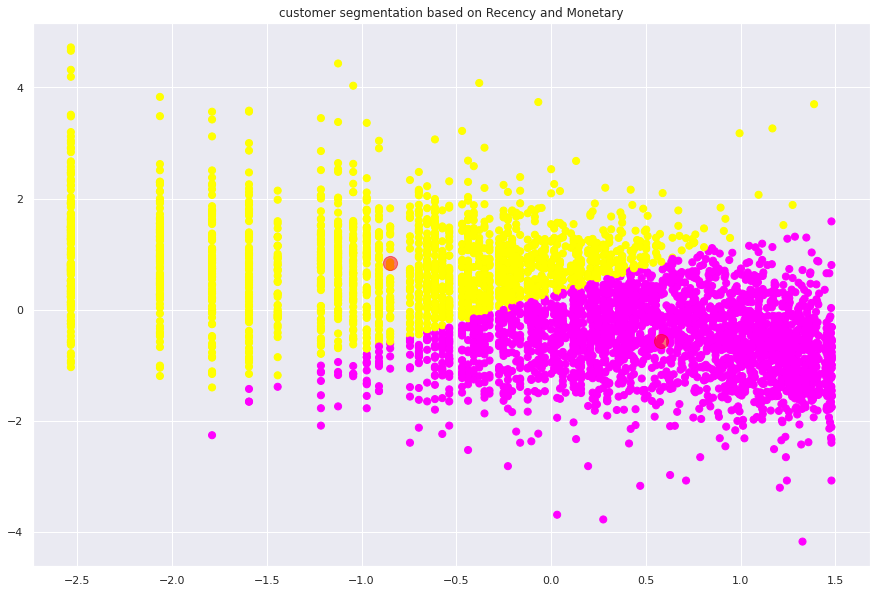

In [341]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Recency and Monetary**
# **Applying DBSCAN on Recency and Monetary**

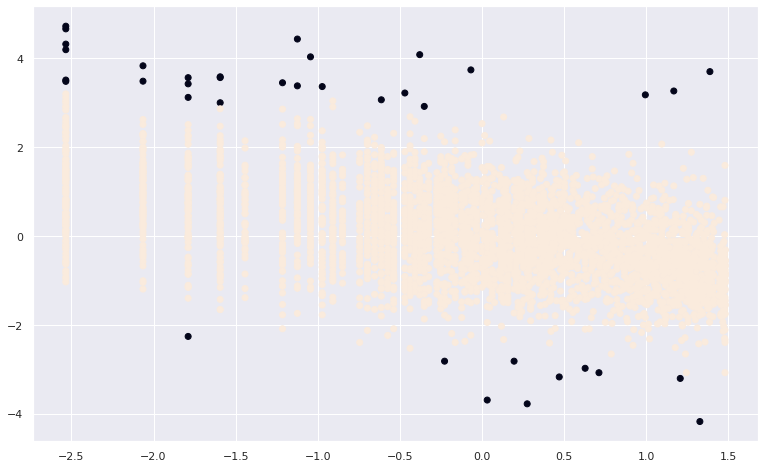

In [342]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Recency and Monetary**
# **Applying silhouette Score Method on Frquency and Monetary**

In [343]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
 
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.37175249381292735
For n_clusters = 5, silhouette score is 0.3451746712805366
For n_clusters = 6, silhouette score is 0.3586829219947334
For n_clusters = 7, silhouette score is 0.3379138263555965
For n_clusters = 8, silhouette score is 0.31807513150365924
For n_clusters = 9, silhouette score is 0.34604428168093465
For n_clusters = 10, silhouette score is 0.3589556785500661
For n_clusters = 11, silhouette score is 0.36961037314835105
For n_clusters = 12, silhouette score is 0.354641164469907
For n_clusters = 13, silhouette score is 0.36252214041341885
For n_clusters = 14, silhouette score is 0.3477351021261964
For n_clusters = 15, silhouette score is 0.3678947648073341


# **Applying Elbow Method on Frequency and Monetary**

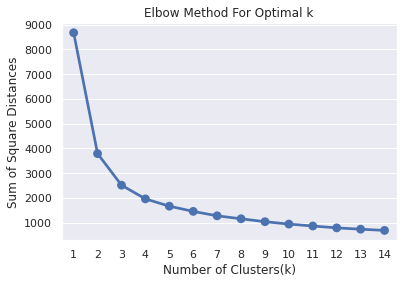

In [344]:
from sklearn.cluster import KMeans
 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

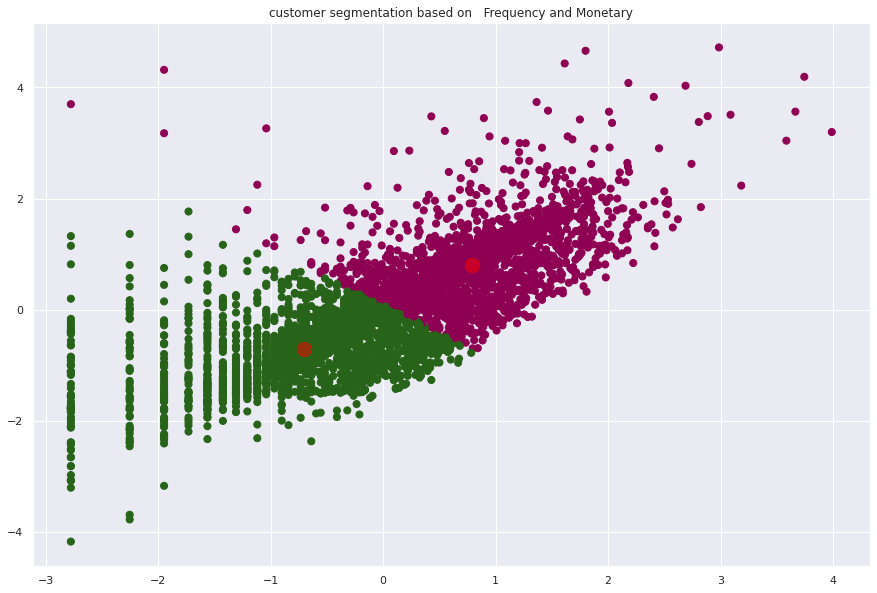

In [345]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**
# **Applying DBSCAN to Method on Frquency and Monetary**

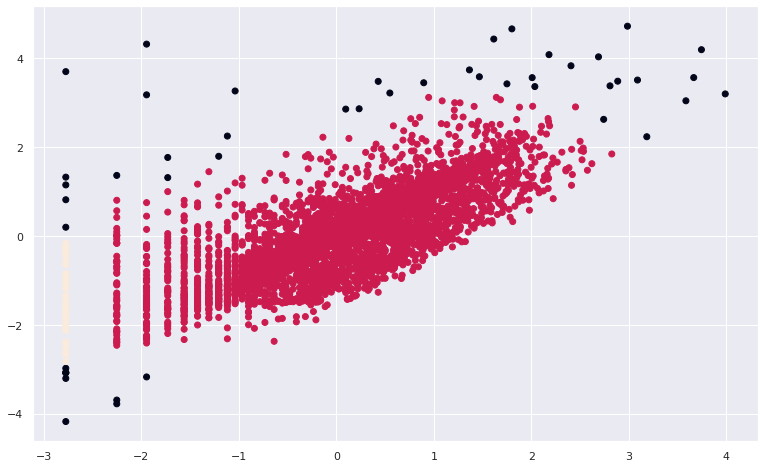

In [346]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

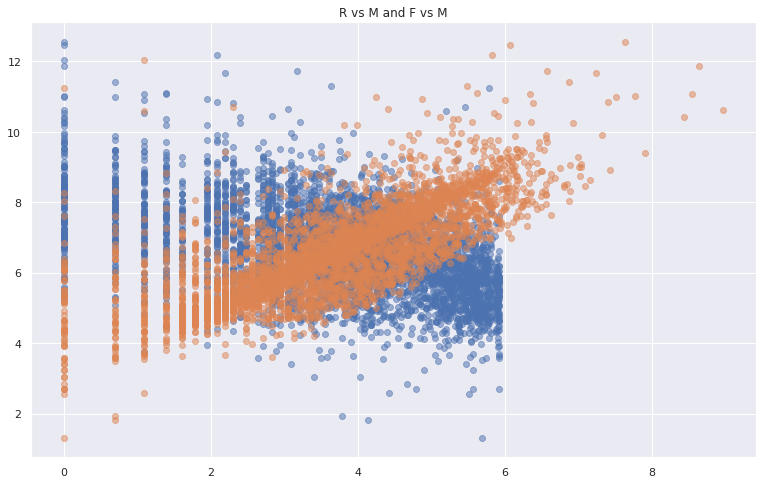

In [347]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

# **3D visualization of Recency ,Frequency and Monetary**

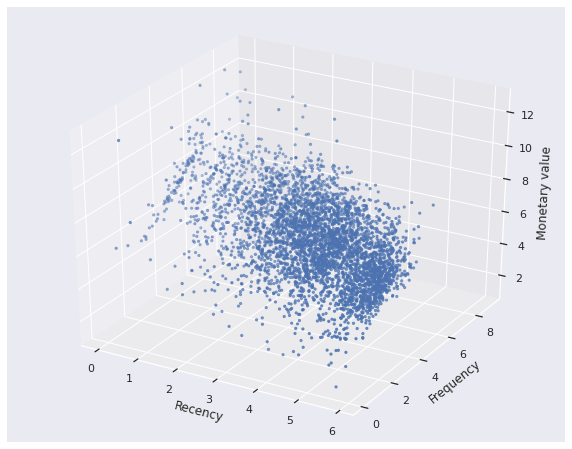

In [348]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# **Applying Silhouette Method on Recency ,Frequency and Monetary**

For n_clusters = 2 The average silhouette_score is : 0.3956478042246982
For n_clusters = 3 The average silhouette_score is : 0.3049826724447913
For n_clusters = 4 The average silhouette_score is : 0.30279724233096916
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.2613208163968789
For n_clusters = 8 The average silhouette_score is : 0.2640918249728342
For n_clusters = 9 The average silhouette_score is : 0.2585642595481418
For n_clusters = 10 The average silhouette_score is : 0.2644733794304285
For n_clusters = 11 The average silhouette_score is : 0.2592423011915937
For n_clusters = 12 The average silhouette_score is : 0.26503813251658404
For n_clusters = 13 The average silhouette_score is : 0.2621555416679574
For n_clusters = 14 The average silhouette_score is : 0.26140947155997746
For n_clusters = 15 The average silhouette_score is : 0.

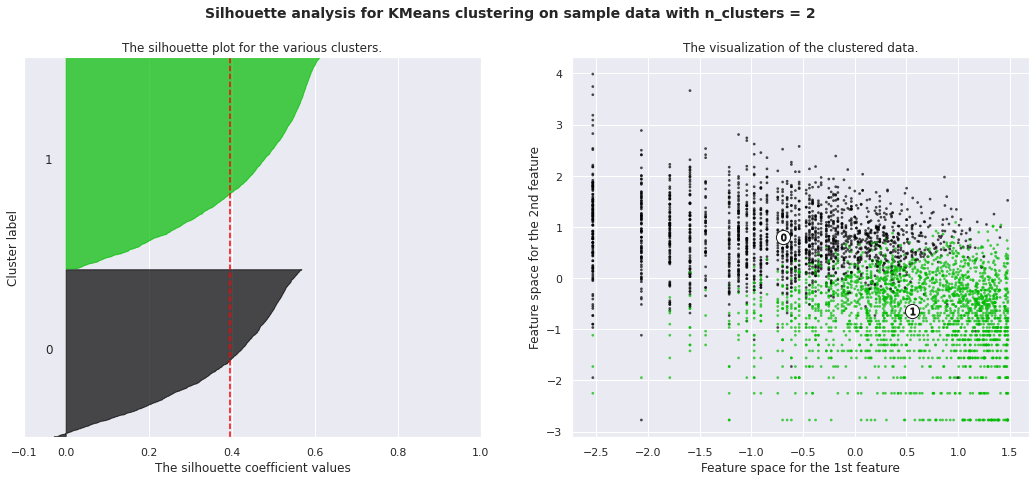

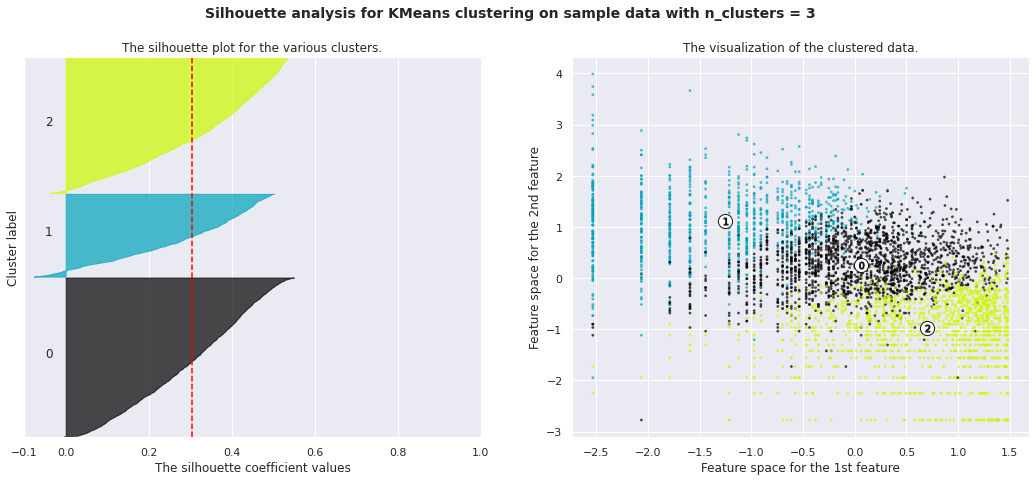

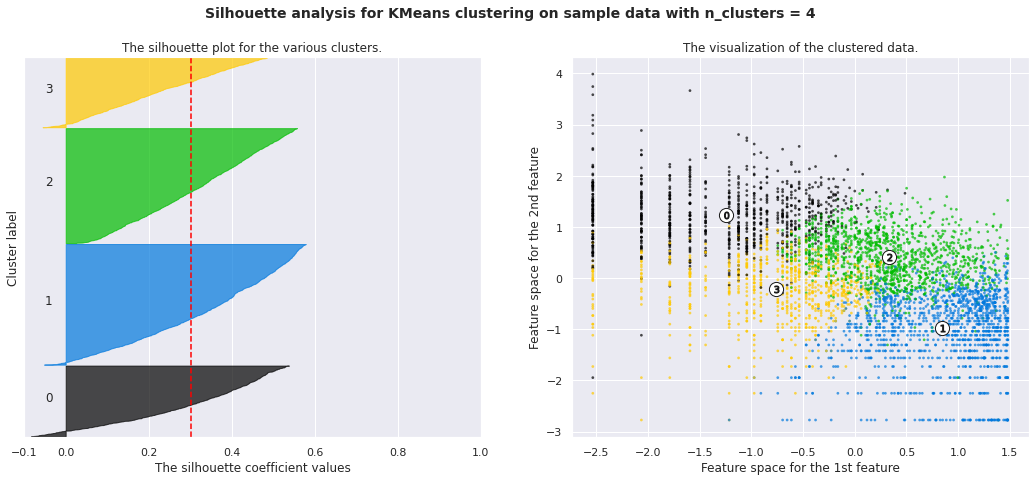

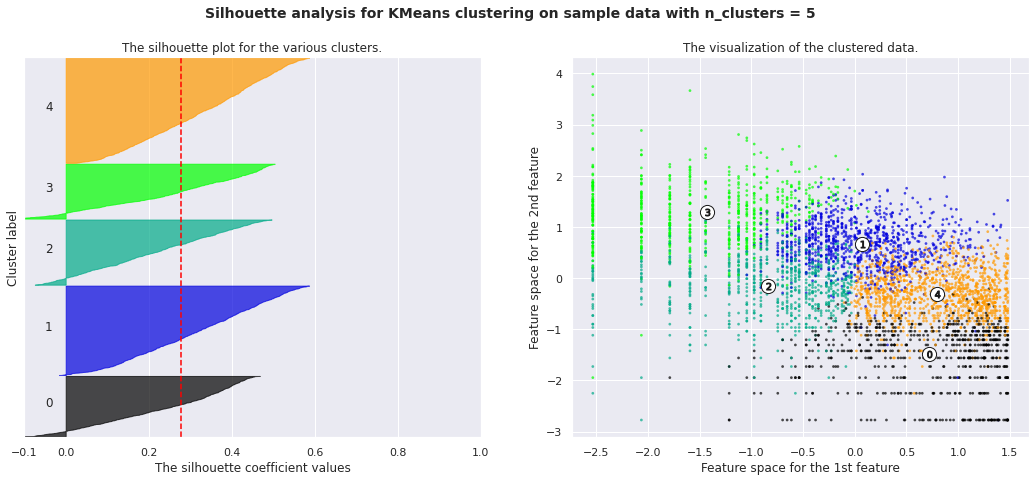

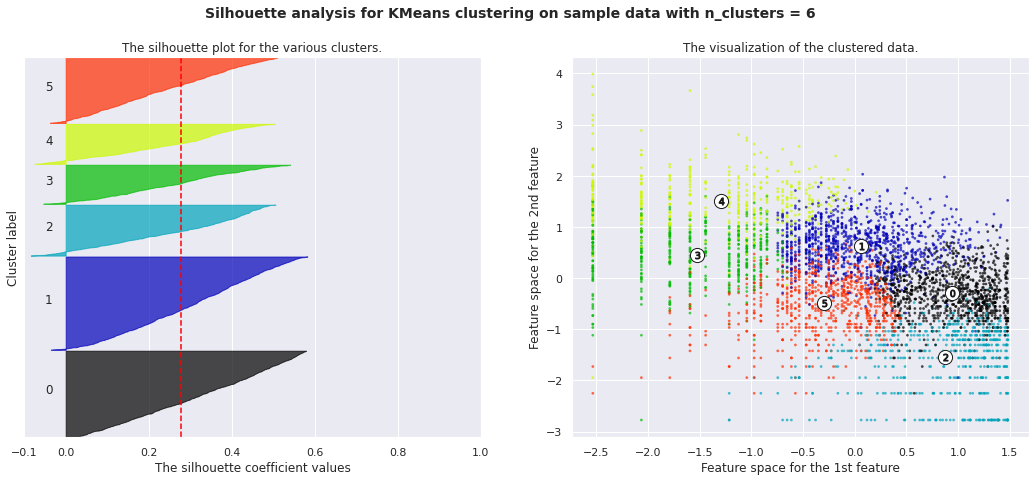

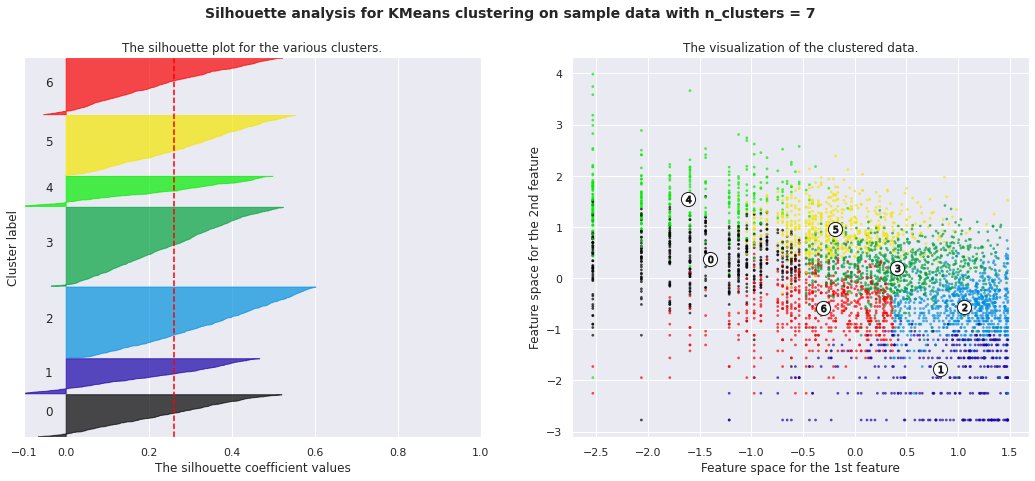

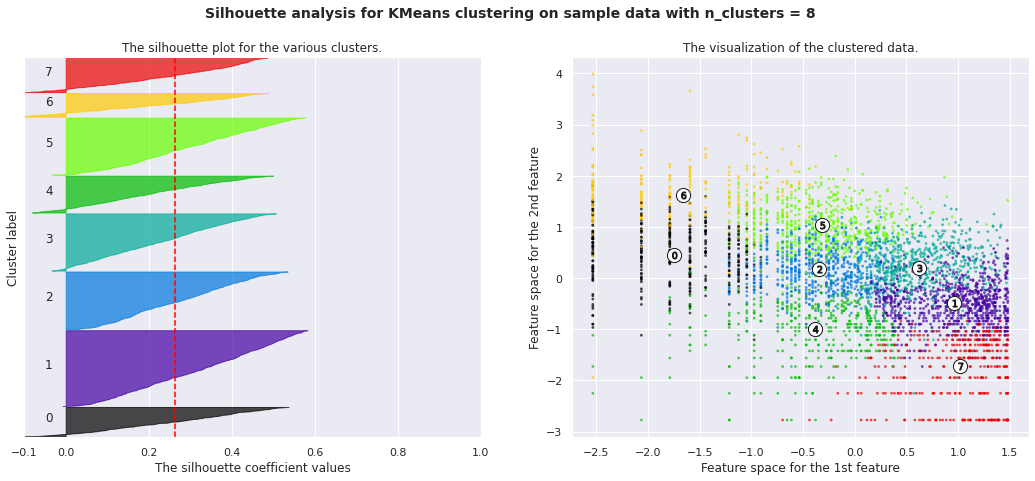

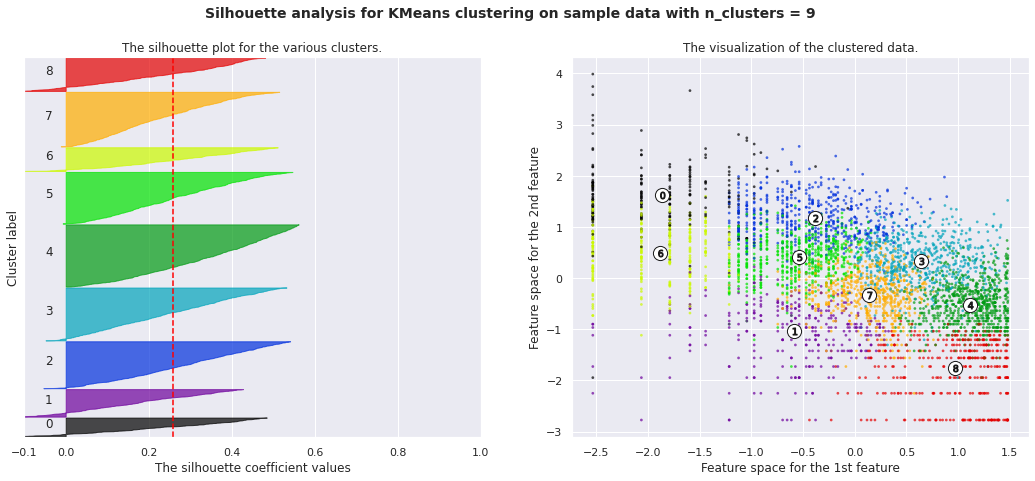

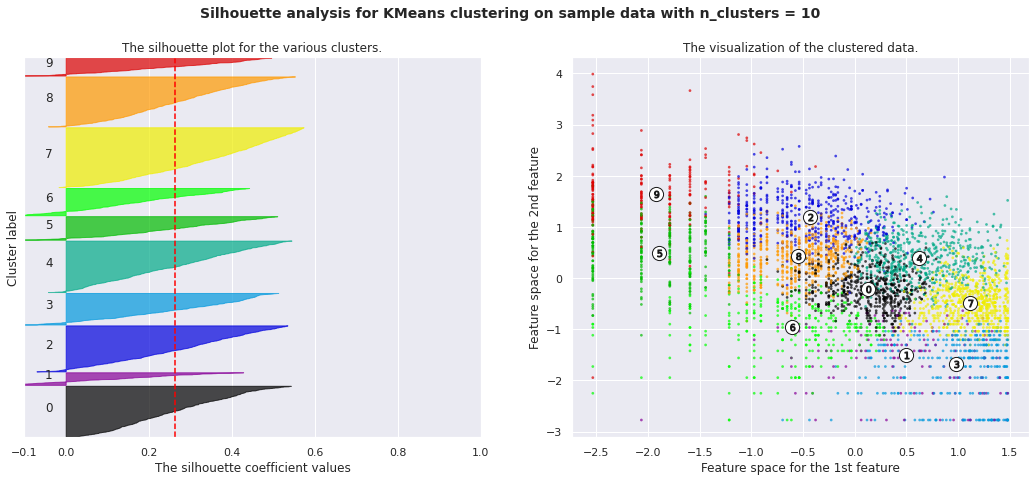

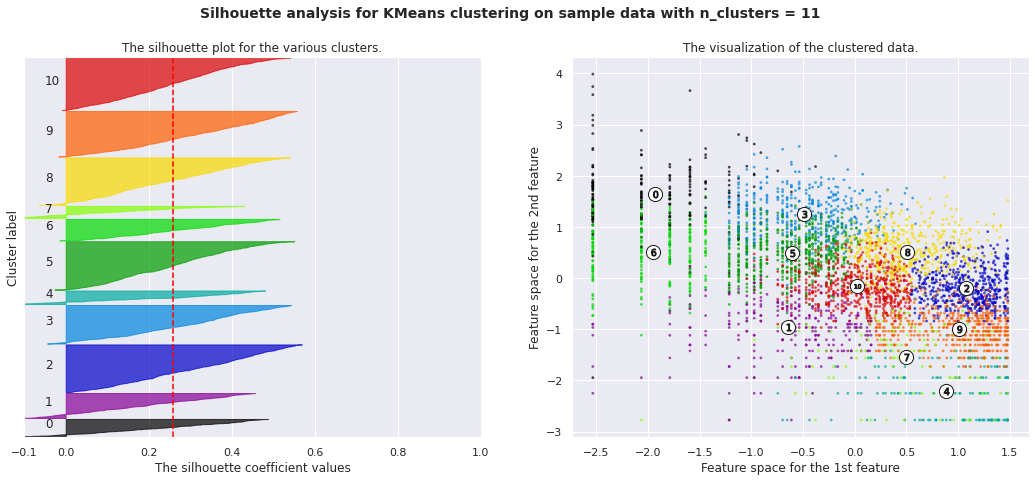

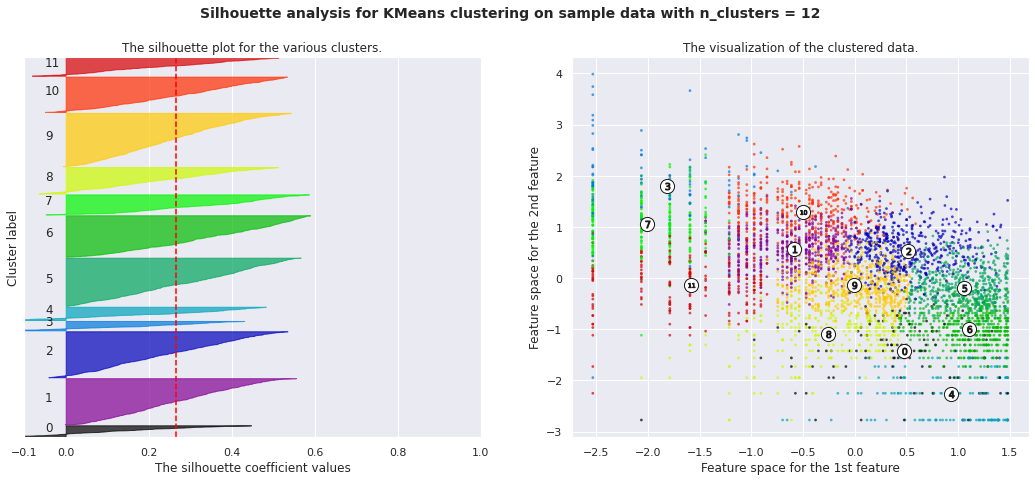

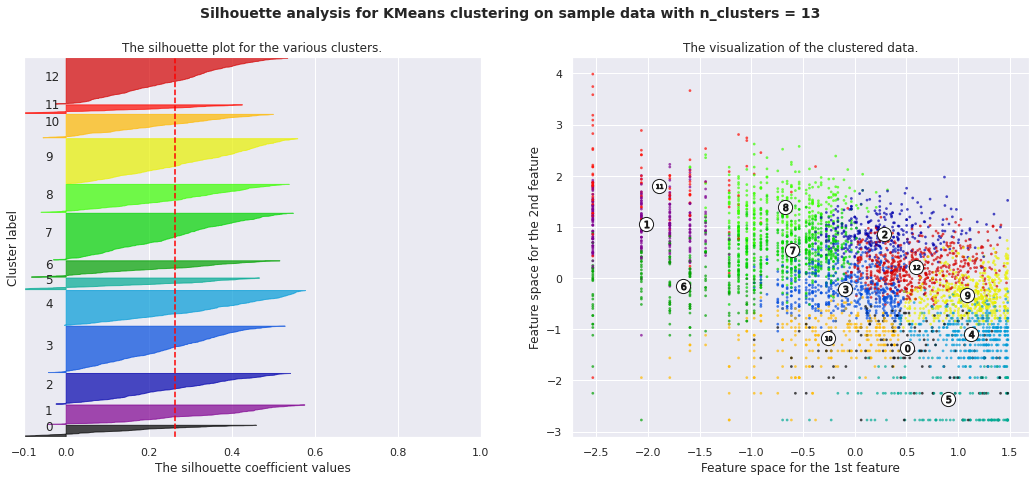

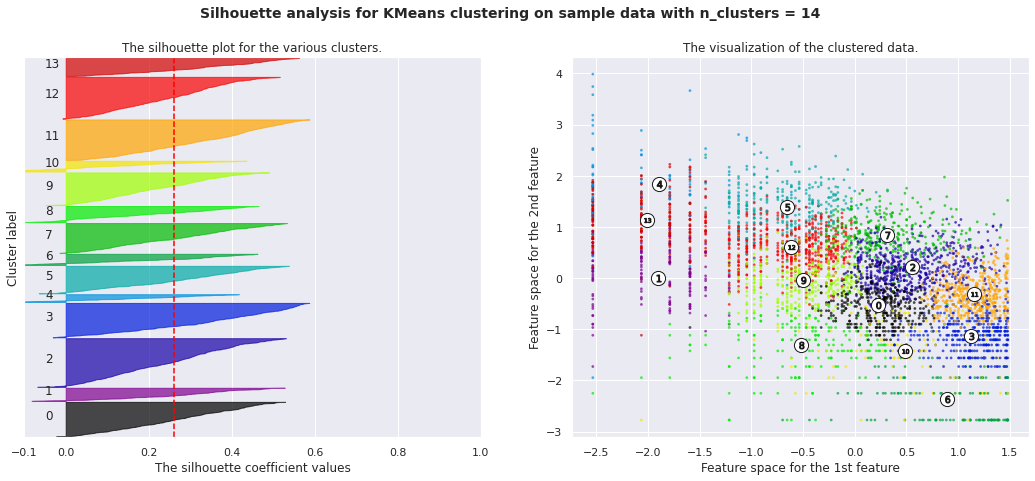

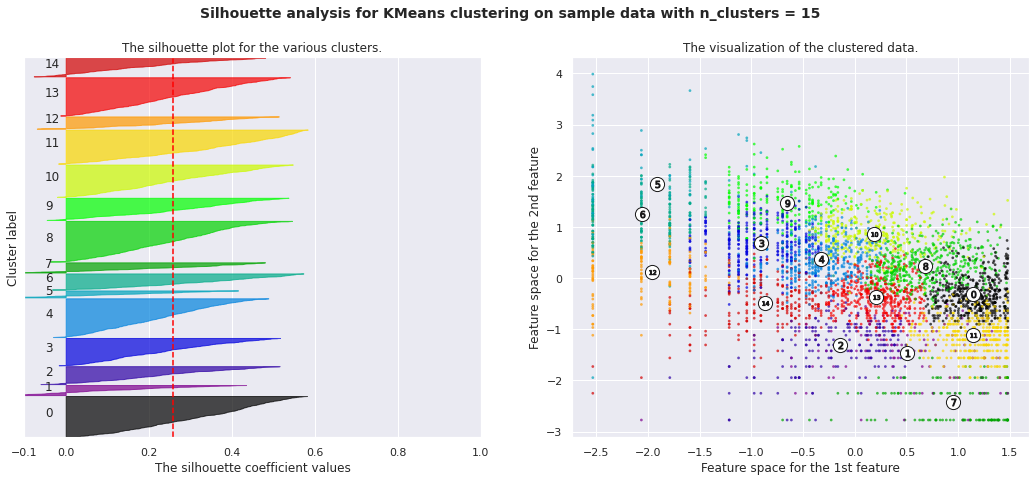

In [349]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
 
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
plt.show()

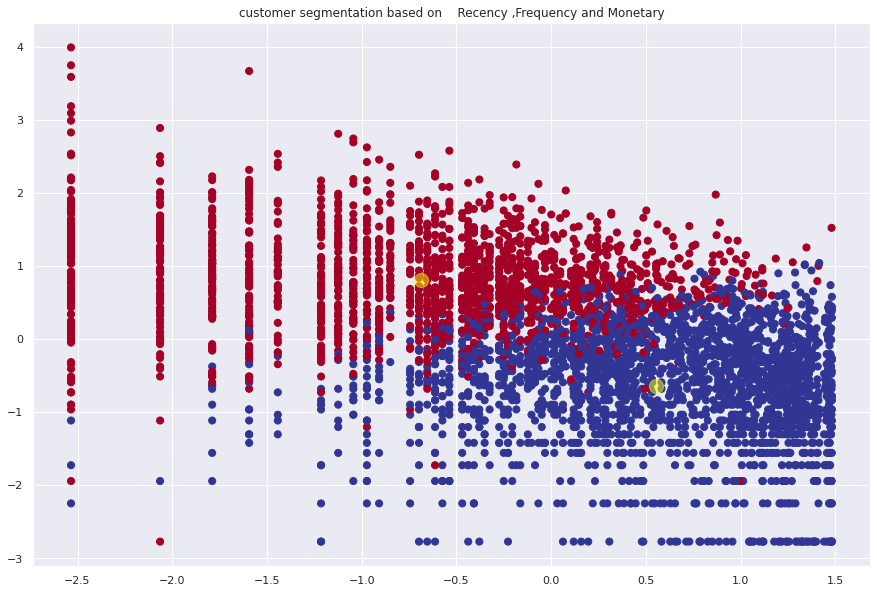

In [350]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**
# **Applying Elbow Method on Recency ,Frequency and Monetary**

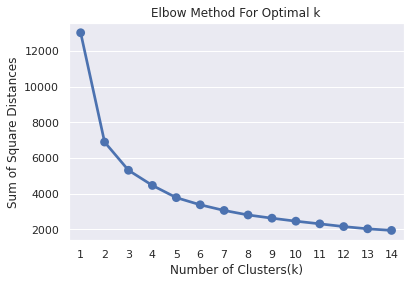

In [351]:
from sklearn.cluster import KMeans
 
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [352]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)
 
#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M  Recency_log  Frequency_log  \
CustomerID                                                                      
12346.0         325          1  77183.60  4  4  1     5.783825       0.000000   
12347.0           2        182   4310.00  1  1  1     0.693147       5.204007   
12348.0          75         31   1797.24  3  3  1     4.317488       3.433987   
12349.0          18         73   1757.55  2  2  1     2.890372       4.290459   
12350.0         310         17    334.40  4  4  3     5.736572       2.833213   
12352.0          36         85   2506.04  2  2  1     3.583519       4.442651   
12353.0         204          4     89.00  4  4  4     5.318120       1.386294   
12354.0         232         58   1079.40  4  2  2     5.446737       4.060443   
12355.0         214         13    459.40  4  4  3     5.365976       2.564949   
12356.0          22         59   2811.43  2  2  1     3.091042       4.077537   

            Monetary_log  Cluster  
CustomerID                         
12346.0        11.253942        1  
12347.0         8.368693        0  
12348.0         7.494007        1  
12349.0         7.471676        0  
12350.0         5.812338        1  
12352.0         7.826459        0  
12353.0         4.488636        1  
12354.0         6.984161        1  
12355.0         6.129921        1  
12356.0         7.941449        0

# **Dendogram to find the optimal number of clusters**

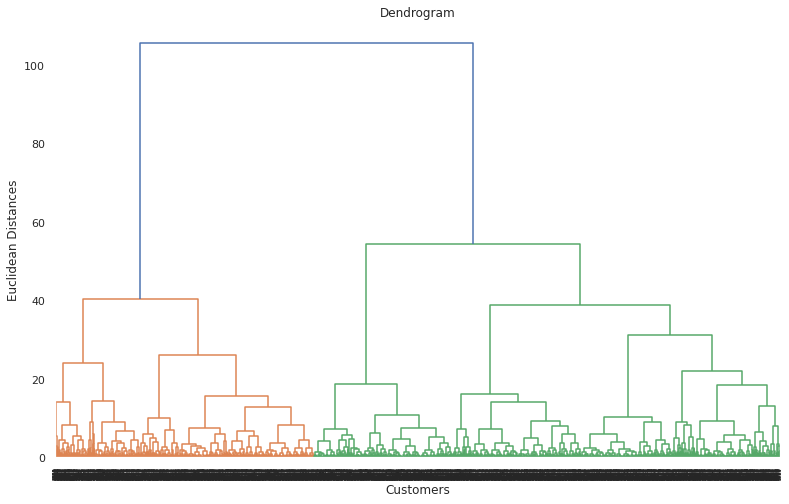

In [353]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line


### **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**
## **No. of Cluster = 2**

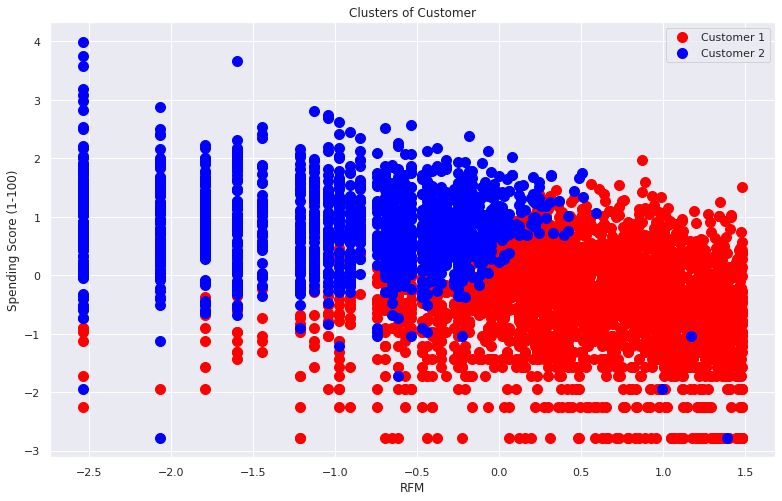

In [354]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
 
plt.title('Clusters of Customer')
plt.xlabel('RFM')
 
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


* **By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**
# **Applying DBSCAN to Recency ,Frequency and Monetary**

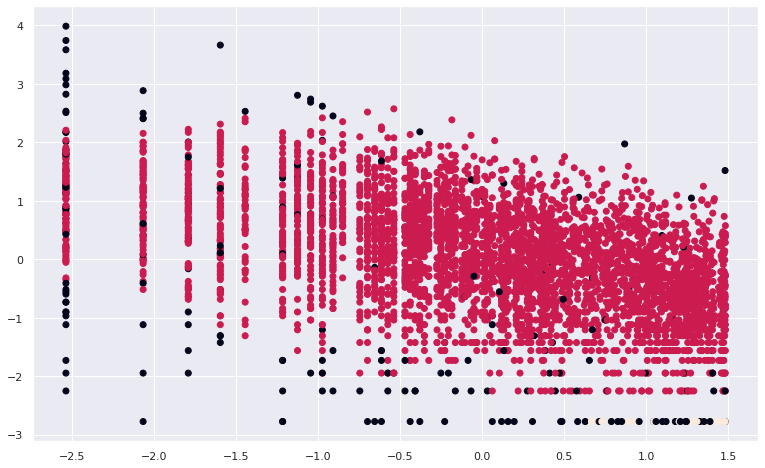

In [355]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**
# **Summary**

In [356]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
 
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

* Number of clusters required is 2 for best performance.